In [1]:
from pathlib import Path
import time

import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt

from src.models.fetch_data_2d import get_tf_dataset, tf_parse_image, parse_image

In [2]:
path_data_nii = Path("/home/val/python_wkspce/plc_seg/data/interim/nii_raw")
path_mask_lung_nii = Path(
    "/home/val/python_wkspce/plc_seg/data/interim/lung_contours")

patient_list = [
    f.name.split("__")[0] for f in path_mask_lung_nii.rglob("*LUNG*")
]

patient_ds = tf.data.Dataset.from_tensor_slices(patient_list)

n = 2
sradius = 3
t1 = time.time()
for p in patient_ds.take(n):
    results = parse_image(
        p,
        path_data_nii,
        path_mask_lung_nii,
        spacing=(1, 1, 1),
        ct_window_str="lung",
        output_shape=(256, 256),
        random_center=True,
        augment_mirror=True,
        augment_angles=(20, 20, 45),
        interp_order=3,
        mask_smoothing=True,
        smoothing_radius=sradius,
    )

In [3]:
results[0].shape

(256, 256, 2)

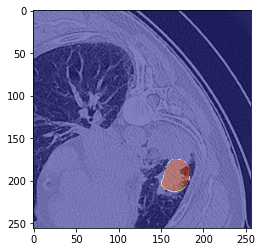

In [9]:
plt.imshow(results[0][:,:,0],cmap='gray')
plt.imshow(results[1][:,:,0], cmap='jet', alpha=0.5)

In [ ]:
len(patient_list)

In [ ]:
data =  get_tf_dataset(
    patient_list,
    path_data_nii,
    path_mask_lung_nii,
    random_center=False,
    augment_angles=(0,0,0),
    augment_mirror=False,
    num_parallel_calls=None,
    output_shape=(128, 128, 128),
    spacing=(1, 1, 1),
    ct_window_str="lung",
    return_patient_name=True,
    interp_order=3,
    mask_smoothing=True,
    smoothing_radius=3,
    )

In [ ]:
X = data.batch(2).take(1).as_numpy_iterator()

In [ ]:
def find_middle_slice(mask, axis=2):
    positions = np.where(mask!=0)
    return int((np.min(positions[axis]) + np.max(positions[axis])) * 0.5)

In [ ]:
image, mask, patient = next(X)

In [ ]:
b=1
msk = mask[b,:,:,:, 0]
s = find_middle_slice(msk, axis=2)

In [ ]:
print(f"patient: {patient[b]}")
c=0 # 0:ct, 1:pt
c_m=3 # 0: gtv t, 1:gtv l, 2: lung1, 3: lung2
delta_s = 0

plt.imshow(image[b,:,:,s+delta_s, c],cmap='gray')
plt.imshow(mask[b,:,:,s+delta_s,c_m], cmap='jet', alpha=0.5)

In [ ]:
for i in range(1):
    start = time.time()
    image, mask = next(X)
    print(f"image number {i}")
    print(image.shape)
    end = time.time()
    print(f"time to processe it {end - start}")


In [ ]:
plt.imshow(image[0,:,:,72, 0])